In [2]:
pip install tensorflow

   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/375.7 MB 3.4 MB/s eta 0:01:52
   ---------------------------------------- 0.8/375.7 MB 2.1 MB/s eta 0:02:59
   ---------------------------------------- 1.6/375.7 MB 2.7 MB/s eta 0:02:19
   ---------------------------------------- 2.1/375.7 MB 3.0 MB/s eta 0:02:04
   ---------------------------------------- 2.6/375.7 MB 2.7 MB/s eta 0:02:21
   ---------------------------------------- 2.6/375.7 MB 2.7 MB/s eta 0:02:21
   ---------------------------------------- 2.9/375.7 MB 2.2 MB/s eta 0:02:47
   ---------------------------------------- 3.4/375.7 MB 2.0 MB/s eta 0:03:04
   ---------------------------------------- 3.7/375.7 MB 2.0 MB/s eta 0:03:08
   ---------------------------------------- 3.9/375.7 MB 1.9 MB/s eta 0:03:20
   ---------------------------------------- 3.9/375.7 MB 1.9 MB/s eta 0:03:20
   ---------------------------------------- 3.9/375.7 MB 1.9 MB/s eta 0

  You can safely remove it manually.
  You can safely remove it manually.


   ---------------------------- --------- 283.9/375.7 MB 597.0 kB/s eta 0:02:34
   ---------------------------- --------- 284.2/375.7 MB 594.5 kB/s eta 0:02:35
   ---------------------------- --------- 284.4/375.7 MB 595.7 kB/s eta 0:02:34
   ---------------------------- --------- 284.4/375.7 MB 595.7 kB/s eta 0:02:34
   ---------------------------- --------- 284.4/375.7 MB 595.7 kB/s eta 0:02:34
   ---------------------------- --------- 284.7/375.7 MB 568.0 kB/s eta 0:02:41
   ---------------------------- --------- 284.7/375.7 MB 568.0 kB/s eta 0:02:41
   ---------------------------- --------- 284.7/375.7 MB 568.0 kB/s eta 0:02:41
   ---------------------------- --------- 285.0/375.7 MB 558.9 kB/s eta 0:02:43
   ---------------------------- --------- 285.0/375.7 MB 558.9 kB/s eta 0:02:43
   ---------------------------- --------- 285.0/375.7 MB 558.9 kB/s eta 0:02:43
   ---------------------------- --------- 285.0/375.7 MB 558.9 kB/s eta 0:02:43
   ---------------------------- --------

In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.19.0'

In [6]:
import pandas as pd
df = pd.read_csv("../data/train.csv")

# pixel의 수는 28(세로) * 28(가로) = 784개의 pixel
# label 이라는 column이  있는데 이 값이 바로 target(label) = y

# 이 데이터를 학습해서 multinominal을 수행
# 학습데이터(train)와 테스트 데이터(test)를 나누어서 평가를 진행
# 우리가 평가한 모델으 정확도를 측정

In [7]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.tail()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(60000, 785)

In [10]:
28 * 28

784

In [11]:
df.iloc[0]

label    5
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Name: 0, Length: 785, dtype: int64

In [12]:
import numpy as np
import tensorflow as tf                                    # tensorflow 기본 import
from tensorflow.keras.models import Sequential             # model box 구성
from tensorflow.keras.layers import Flatten, Dense, Input  # model 안의 input layer와
                                                           # output layer를 구성
from tensorflow.keras.optimizers import SGD                # 알고리즘 담당
from sklearn.model_selection import train_test_split       # train Data, Test Data 분리
from sklearn.preprocessing import MinMaxScaler             # 데이터 정규화
                                                           # 컴퓨터가 큰숫자를 작은숫자로 변경
                                                           # 0~1사이 실수 값으로 변경

In [13]:
# Train data와 Test Data() 분리해야 해요
# pixel Data(x)와 label Data(y)를 분리해야 해요.
# 독립변수와 종속변수를 분리해야 해요.
x_data = df.drop('label', axis=1, inplace=False)  # 2 차원 협태의 pixel(28 * 28)
y_data = df['label']    # 1차원

In [14]:
x_data.shape

(60000, 784)

In [15]:
y_data.shape

(60000,)

<function matplotlib.pyplot.show(close=None, block=None)>

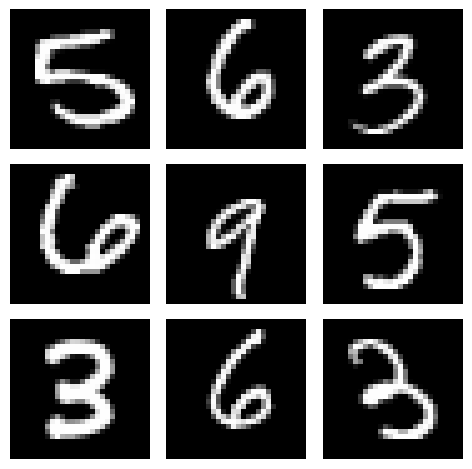

In [16]:
import matplotlib.pyplot as plt
import random

for i in range(1, 4):  # 행 반복
    for j in range(1, 4):  # 열 반복
        plt.subplot(3, 4, (i-1)*4 + j)
        
        # 무작위 행 선택
        rand_index = random.randint(0, len(df) - 1)
        
        # 이미지 데이터만 추출 (예: 첫 번째 열은 레이블이고, 나머지 784개가 픽셀)
        img_data = df.iloc[rand_index, 1:].values.reshape(28, 28)
        
        plt.imshow(img_data, cmap="gray")
        plt.axis('off')  # 축 제거

plt.tight_layout()
plt.show

In [17]:
# pixel data(x_data) 를 정규화(0~1사이의 실수값으로 변화)

scaler = MinMaxScaler()
scaler.fit(x_data)        # scaler를 학습시키고 - min, max
norm_x_data = scaler.transform(x_data)  # scaler 를 통해서 실제로 값을 변환(0 ~ 1 변경)

In [18]:
# 데이터를  분리(train Data와  test Data로 분리)
# 분리 비율은 일반적으로 8:2 , 7 : 3 정도로 분리해요(korea style, america style = 7.5 : 2.5(3:1))
# 현재 우리의 x_data = norm_x_data
# 현재 우리의 y_data = y_data

train_norm_x_data, test_norm_x_data, train_y_data, test_y_data =\
        train_test_split(norm_x_data, y_data, test_size=0.3)          # 7:3으로 분리

In [19]:
train_norm_x_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
train_norm_x_data.shape

(42000, 784)

In [21]:
test_norm_x_data.shape

(18000, 784)

In [22]:
train_norm_x_data = train_norm_x_data.reshape(-1, 28, 28)
test_norm_x_data = test_norm_x_data.reshape(-1, 28, 28)

In [23]:
train_norm_x_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [24]:
model = Sequential([
    Input(shape=(28, 28)),  # 첫 번째 레이어는 Input
    Flatten(),              # 이후 Flatten 등 추가
    Dense(10, activation='softmax')
])

In [31]:
model = Sequential()    # model 생성

model.add(Input(shape=(28,28)))  # 모델 box에 input layer 추가
model.add(Flatten())     

model.add(Dense(units=10, activation="softmax")) # 모델 box에 output layer 추가
                      # activation은 확률을 알아내기 위해 각 노드가 수행하는 수학적 연산.

In [33]:
# model이 어떻게 도작하는지를 지정
model.compile(optimizer=SGD(learning_rate=0.001),       # 경사 하강법  1 / 1,000
              loss="sparse_categorical_crossentropy",   # one hot encoding
              metrics=["accuracy"]                      # 정확도 
             )

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
4200/1050

4.0

In [34]:
# 설정이 끝났으면 모델을 학습
hist = model.fit(train_norm_x_data,
          train_y_data,
          epochs=200,
          verbose=1,
          validation_split=0.2)

Epoch 1/200
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2944 - loss: 2.1149 - val_accuracy: 0.6518 - val_loss: 1.5762
Epoch 2/200
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - accuracy: 0.6866 - loss: 1.4575 - val_accuracy: 0.7479 - val_loss: 1.2091
Epoch 3/200
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.7666 - loss: 1.1384 - val_accuracy: 0.7892 - val_loss: 1.0121
Epoch 4/200
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 0.7992 - loss: 0.9708 - val_accuracy: 0.8120 - val_loss: 0.8920
Epoch 5/200
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - accuracy: 0.8166 - loss: 0.8551 - val_accuracy: 0.8226 - val_loss: 0.8112
Epoch 6/200
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 0.8313 - loss: 0.7803 - val_accuracy: 0.8319 - val_loss: 0.7530
Epoch 7/200
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.8352 - loss: 0.7257 - val_accuracy: 0.8385 - val_loss: 0.7087
Epoch 8/200
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - accuracy: 0.

In [35]:
# Evaluation

print(model.evaluate(test_norm_x_data, test_y_data))

#        loss                 accuracy    
# [0.35500258207321167, 0.9011111259460449]

#우리 모델은 정확도가 90.1% 인 모델이예요!
# 머신러닝의 regression 중 Logistic Regressionㅇㄹ 여러개 결합해서
# 구현한 Multinomial 을 구현한것이다.

563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.9072 - loss: 0.3241
[0.3170613944530487, 0.9104999899864197]


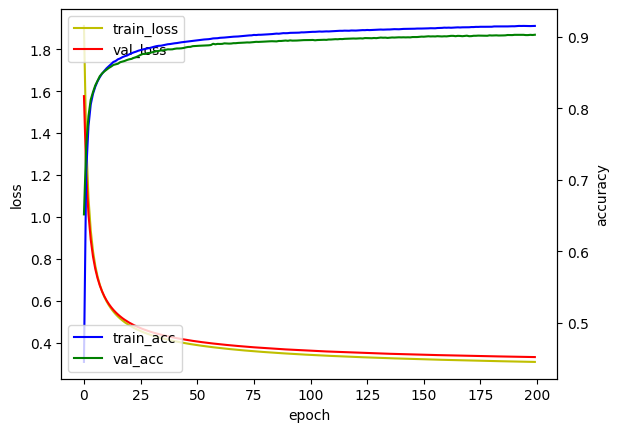

In [36]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")

In [41]:
model2 = Sequential()    # model 생성

model2.add(Flatten(input_shape=(28,28)))        # 모델 box에 input layer 추가
model2.add(Dense(512, activation="sigmoid"))     # 모델 box에 hidden layer 추가
model2.add(Dense(10, activation="softmax"))      # 모델 box에 output layer 추가
                      # activation은 확률을 알아내기 위해 각 노드가 수행하는 수학적 연산.
# model이 어떻게 도작하는지를 지정
model2.compile(optimizer=SGD(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# 설정이 끝났으면 모델을 학습
hist2 = model2.fit(train_norm_x_data,
          train_y_data,
          epochs=100,
          batch_size=32,
          verbose=1,
          validation_split=0.2)

Epoch 1/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2109 - loss: 2.3127 - val_accuracy: 0.4343 - val_loss: 2.1321
Epoch 2/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5048 - loss: 2.0855 - val_accuracy: 0.5990 - val_loss: 1.9741
Epoch 3/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6203 - loss: 1.9299 - val_accuracy: 0.6593 - val_loss: 1.8283
Epoch 4/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6735 - loss: 1.7862 - val_accuracy: 0.6785 - val_loss: 1.6936
Epoch 5/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7085 - loss: 1.6493 - val_accuracy: 0.7339 - val_loss: 1.5706
Epoch 6/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7435 - loss: 1.5304 - val_accuracy: 0.7452 - val_loss: 1.4561
Epoch 7/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7574 - loss: 1.4162 - val_accuracy: 0.7676 - val_loss: 1.3555
Epoch 8/100
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7728 - loss: 1

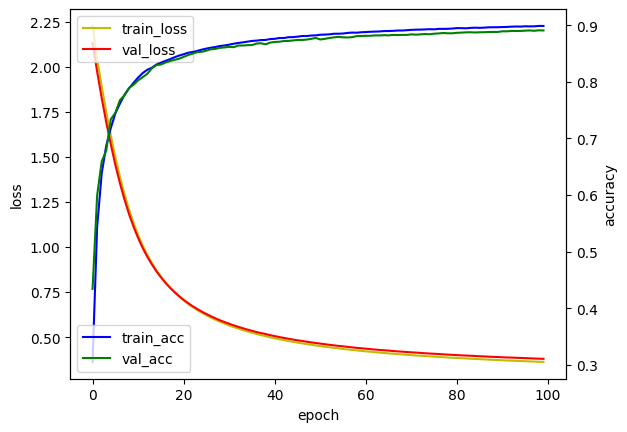

In [43]:
import matplotlib.pyplot as plt

hist = hist2
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")